## Link prediction for network science authors

In [13]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import math
from collections import defaultdict


In [14]:
G = nx.read_gml('datasets/Network_Science/netscience.gml')

In [ ]:
# quick single-line summary (use nx.info if available, otherwise fallback)
try:
    info = nx.info(G)
except Exception:
    info = f"nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}, density: {nx.density(G):.4f}"
print(info)

# richer overview
print("nodes:", G.number_of_nodes())
print("edges:", G.number_of_edges())
print("density:", nx.density(G))
print("avg clustering:", nx.average_clustering(G))
print("degree assortativity:", nx.degree_assortativity_coefficient(G))
print("number connected components:", nx.number_of_connected_components(G))

# degree distribution and basic stats
deg = np.array([d for _, d in G.degree()])
print("degree: min/median/mean/max =", deg.min(), np.median(deg), deg.mean(), deg.max())
print("degree histogram (counts by degree):", nx.degree_histogram(G))

# shortest-path stats if connected
if nx.is_connected(G):
    print("avg shortest path length:", nx.average_shortest_path_length(G))
else:
    print("graph not connected — compute per-component if needed")


nodes: 1589
edges: 2742
density: 0.0021733168683312383
avg clustering: 0.6377905695067805
degree assortativity: 0.46162246675258334
degree: min/median/mean/max = 0 3.0 3.4512271869100064 34
degree histogram (counts by degree): [128, 307, 358, 257, 180, 98, 49, 65, 34, 46, 8, 9, 10, 0, 6, 3, 2, 1, 1, 19, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1]
graph not connected — compute per-component if needed


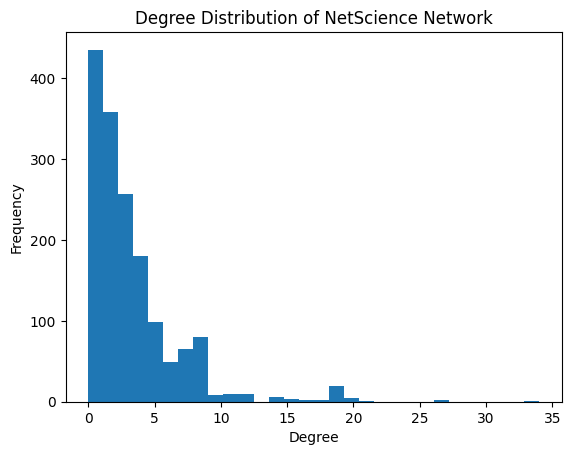

Number of Nodes: 1589
Number of Edges: 2742
Density: 0.0021733168683312383
Average Clustering Coefficient: 0.6377905695067805
Number of Connected Components: 396
Average Degree: 3.4512271869100064


In [23]:

# Basic EDA
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_clustering = nx.average_clustering(G)
connected_components = nx.number_connected_components(G)
degrees = [deg for _, deg in G.degree()]

# Summary metrics
eda_summary = {
    "Number of Nodes": num_nodes,
    "Number of Edges": num_edges,
    "Density": density,
    "Average Clustering Coefficient": avg_clustering,
    "Number of Connected Components": connected_components,
    "Average Degree": sum(degrees) / len(degrees),
}

# Display degree distribution
plt.hist(degrees, bins=30)
plt.title("Degree Distribution of NetScience Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print summary
for key, value in eda_summary.items():
    print(f"{key}: {value}")

🧩 Number of clusters detected: 19
📊 Modularity score: 0.847

Top 10 largest clusters by size:
0     8
1    12
2    33
3    43
4     9
5    27
6    17
7    29
8    24
9     8
Name: count, dtype: int64


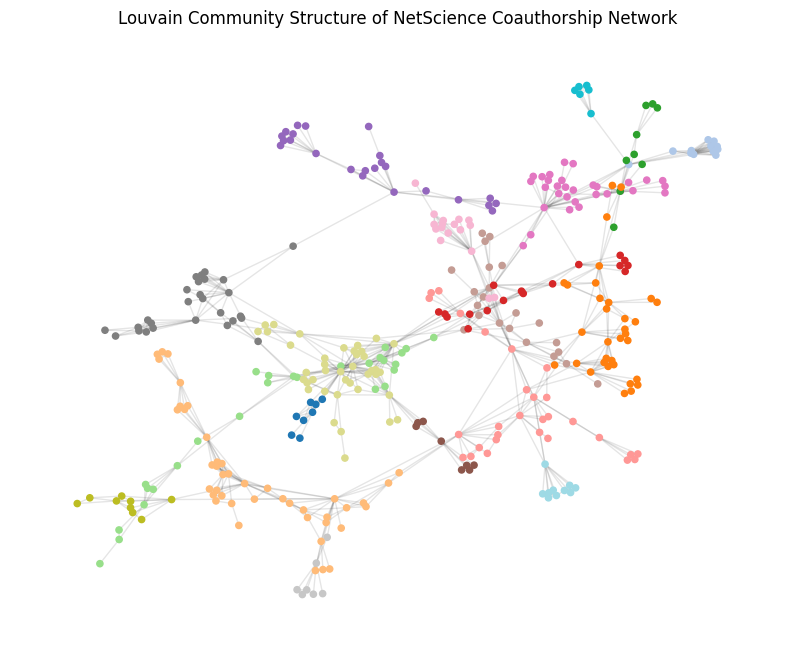

In [25]:
# --- 1️⃣ Detecting Communities (Clusters) with Louvain Modularity ---

import networkx as nx
import community as community_louvain  # python-louvain package
import matplotlib.pyplot as plt
import pandas as pd

# Use largest connected component for meaningful community detection
largest_cc = max(nx.connected_components(G), key=len)
G_cc = G.subgraph(largest_cc).copy()

# Compute Louvain communities
partition = community_louvain.best_partition(G_cc, weight='weight')

# Add community labels to graph nodes
nx.set_node_attributes(G_cc, partition, 'community')

# Compute modularity
modularity = community_louvain.modularity(partition, G_cc, weight='weight')

# Count communities
num_clusters = len(set(partition.values()))

# Cluster size distribution
cluster_sizes = pd.Series(list(partition.values())).value_counts().sort_index()

# --- Summary ---
print(f"🧩 Number of clusters detected: {num_clusters}")
print(f"📊 Modularity score: {modularity:.3f}")
print("\nTop 10 largest clusters by size:")
print(cluster_sizes.head(10))

# --- Optional visualization of a subset ---
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_cc, seed=42)
communities = [partition[node] for node in G_cc.nodes()]
nx.draw_networkx_nodes(G_cc, pos, node_size=20, node_color=communities, cmap='tab20')
nx.draw_networkx_edges(G_cc, pos, alpha=0.1)
plt.title("Louvain Community Structure of NetScience Coauthorship Network")
plt.axis("off")
plt.show()